In [4]:
#Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('data.csv')

<b>1) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4. (No loops)</b>

In [5]:
dataset['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

<b>Class1</b> - Basic Service-266<br>
<b>Class2</b> - E-Service-217<br>
<b>Class3</b> - Plus Service-</b>281<br>
<b>Class4</b> - Total Service-</b>236

In [6]:
dataset

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,3,1
996,1,7,34,0,2,22,5,5,0,1,1,1
997,3,67,59,0,40,944,5,33,0,1,1,4
998,3,70,49,0,18,87,2,22,0,1,1,3


<b>2) Perform one hot encoding on Column 1 (i.e. region) and drop the extra dummy variable.</b>

In [7]:
#Transforming region column using OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_trans = make_column_transformer((OneHotEncoder(), [0]), remainder='passthrough')
dataset = col_trans.fit_transform(dataset)
dataset = pd.DataFrame(dataset)

In [8]:
#Renaming column header for better understanding
dataset.columns = ['region1','region2','region3','tenure','age','martial','address','income','ed','employ','retire','gender','reside','custcat']

In [9]:
#Dropping dummy variable for region3 as if we have values for region1 and region2 we can determine region3
dataset.drop(['region3'],inplace = True,axis=1)
dataset

,region1,region2,tenure,age,martial,address,income,ed,employ,retire,gender,reside,custcat
0,0.0,1.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0,1.0
1,0.0,0.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0,4.0
2,0.0,0.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0,3.0
3,0.0,1.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,10.0,39.0,0.0,0.0,27.0,3.0,0.0,0.0,1.0,3.0,1.0
996,1.0,0.0,7.0,34.0,0.0,2.0,22.0,5.0,5.0,0.0,1.0,1.0,1.0
997,0.0,0.0,67.0,59.0,0.0,40.0,944.0,5.0,33.0,0.0,1.0,1.0,4.0
998,0.0,0.0,70.0,49.0,0.0,18.0,87.0,2.0,22.0,0.0,1.0,1.0,3.0


<b>3) Create histograms of columns age and income to visually explore their distributions.</b>

Text(0.5, 1.0, 'Age frequency')

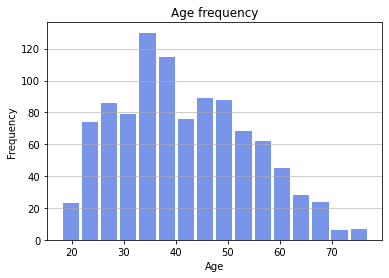

In [10]:
#Plotting a histogram for 'age' column
n, bins, patches = plt.hist(x=dataset['age'], bins='auto', color='#4169e1',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency')

#'age' column doesn't show high left or right skewness

Text(0.5, 1.0, 'Income frequency')

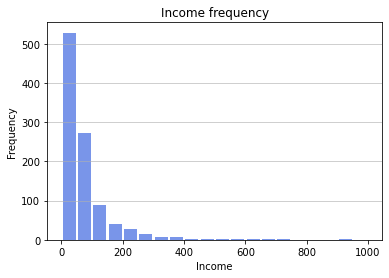

In [11]:
#Plotting a histogram for 'income' column
bin_list = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
n, bins, patches = plt.hist(x=dataset['income'], bins=bin_list, color='#4169e1',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income frequency')

#'income' column is right skewed. The distribution is high betwwen 0-200.

<b>4) Split the dataset into training (70%) and testing set (30%). Perform normalization of the data using standardization.</b>

In [12]:
#Splitting input variables and target variable
X = dataset.iloc[:,0:12].values
y = dataset.iloc[:,-1].values

#Splitting the dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [13]:
#Checking for class imbalance in Training and Test sets
np.unique(y_train,return_counts=True)

(array([1., 2., 3., 4.]), array([186, 152, 197, 165], dtype=int64))

In [14]:
np.unique(y_test,return_counts=True)

(array([1., 2., 3., 4.]), array([80, 65, 84, 71], dtype=int64))

In [15]:
#Normalizing the data using standardization method
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<b>5) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?</b>

In [17]:
#Fitting Logistic Regression model to Training Set
from sklearn.linear_model import LogisticRegression
logRegObj = LogisticRegression(random_state=0)
logRegObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = logRegObj.predict(X_test)

#Model Accuracy
print("Accuracy:" + str(logRegObj.score(X_test,y_test))+"\n")

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy:0.38666666666666666

Confusion Matrix:
[[41  3 27  9]
 [14 16 23 12]
 [31 11 31 11]
 [19 15  9 28]]


In [18]:
#Missclassification rate for all classes

def getAvgMRperClass(cm):
    total = np.sum(cm)

    FP_c1,FN_c1 = np.sum(cm[1:,0]), np.sum(cm[0,1:])                         #Class1
    missRate_1 = (FP_c1+FN_c1)/total

    FP_c2,FN_c2 = (cm[0,1] + np.sum(cm[2:,1])),(cm[1,0] + np.sum(cm[1,2:]))  #Class2
    missRate_2 = (FP_c2+FN_c2)/total

    FP_c3,FN_c3 = (np.sum(cm[0:2,2])+cm[3,2]), (np.sum(cm[2,0:2]) + cm[2,3]) #Class3 
    missRate_3 = (FP_c3+FN_c3)/total

    FP_c4,FN_c4 = np.sum(cm[0:3,3]),np.sum(cm[3,0:3])                        #Class4
    missRate_4 = (FP_c4+FN_c4)/total

    avgMRperClass = (missRate_1+missRate_2+missRate_3+missRate_4)/len(cm)

    return missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)

def printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass):
    print("Missclassfication Rates for Classes:\n")
    print("Class1: "+str(missRate_1))
    print("Class2: "+str(missRate_2))
    print("Class3: "+str(missRate_3))
    print("Class4: "+str(missRate_4)+"\n")
    print("Average Error Rate per Class: "+str(avgMRperClass))

printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Missclassfication Rates for Classes:

Class1: 0.3433333333333333
Class2: 0.26
Class3: 0.37333333333333335
Class4: 0.25

Average Error Rate per Class: 0.30666666666666664


<b>The testing missclassification error rate is 0.30.</b>

<b>6) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN in a loop with different values of k (starting from k=5) and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?</b>

In [19]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_accuracy_list = []
knn_noOfCluster_list = []
knn_avgErr_Rate_list = []

def getCM(k):
    knnObj = KNeighborsClassifier(n_neighbors=k)
    knnObj.fit(X_train, y_train)
    y_pred = knnObj.predict(X_test)                           #Making predictions on the Test Set
    
    knn_accuracy_list.append(knnObj.score(X_test,y_test))     #Model Accuracy
    cm = confusion_matrix(y_test, y_pred)                     #Evaluating the predictions using a Confusion Matrix
    
    return cm

for k in range(5,71,5):
    cm_l = getCM(k)
    mr_1,mr_2,mr_3,mr_4,avgMR = getAvgMRperClass(cm_l)
    knn_avgErr_Rate_list.append(avgMR)
    knn_noOfCluster_list.append(k)

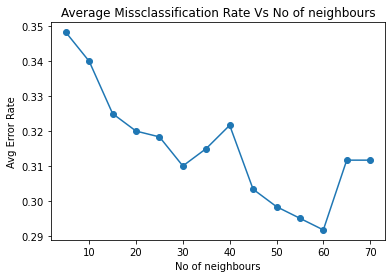

In [20]:
#Plotting miss error rate for test vs No of neighbours
plt.scatter(x=knn_noOfCluster_list,y=knn_avgErr_Rate_list)
plt.plot(knn_noOfCluster_list,knn_avgErr_Rate_list)
plt.title("Average Missclassification Rate Vs No of neighbours")
plt.xlabel("No of neighbours")
plt.ylabel("Avg Error Rate")
plt.show()

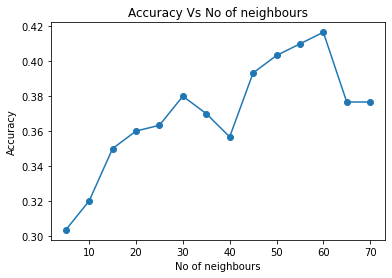

In [21]:
#Plotting miss error rate for test vs accuracy
plt.scatter(x=knn_noOfCluster_list,y=knn_accuracy_list)
plt.plot(knn_noOfCluster_list,knn_accuracy_list)
plt.title("Accuracy Vs No of neighbours")
plt.xlabel("No of neighbours")
plt.ylabel("Accuracy")
plt.show()

In [22]:
print(knn_avgErr_Rate_list)
print(knn_noOfCluster_list)
print(knn_accuracy_list)

[0.34833333333333333, 0.33999999999999997, 0.325, 0.32, 0.31833333333333336, 0.30999999999999994, 0.315, 0.32166666666666666, 0.30333333333333334, 0.29833333333333334, 0.295, 0.2916666666666667, 0.31166666666666665, 0.31166666666666665]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
[0.30333333333333334, 0.32, 0.35, 0.36, 0.36333333333333334, 0.38, 0.37, 0.3566666666666667, 0.3933333333333333, 0.4033333333333333, 0.41, 0.4166666666666667, 0.37666666666666665, 0.37666666666666665]


<b>The legible lowest missclassification rate is 0.30 for k=60.</b>

<b>7) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?</b>

In [23]:
# SVM Model with linear kernel
from sklearn.svm import SVC
svcLinearObj = SVC(kernel='linear')
svcLinearObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = svcLinearObj.predict(X_test)

#Model Accuracy
print("Accuracy: "+str(svcLinearObj.score(X_test,y_test)))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)
print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Accuracy: 0.37666666666666665

Confusion Matrix:
[[45  3 24  8]
 [13 16 23 13]
 [33 12 30  9]
 [22 15 12 22]]

Missclassfication Rates for Classes:

Class1: 0.3433333333333333
Class2: 0.2633333333333333
Class3: 0.37666666666666665
Class4: 0.2633333333333333

Average Error Rate per Class: 0.31166666666666665


<b>SVM-Linear Kernel-Missclassfication rate is 0.31.</b>

In [24]:
# SVM Model with poly kernel
from sklearn.svm import SVC
svcPolyObj = SVC(kernel='poly',degree=5)
svcPolyObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = svcPolyObj.predict(X_test)

#Model Accuracy
print("Accuracy: "+str(svcPolyObj.score(X_test,y_test)))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)
print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Accuracy: 0.36333333333333334

Confusion Matrix:
[[63  2 14  1]
 [32  8 17  8]
 [57  2 21  4]
 [41  4  9 17]]

Missclassfication Rates for Classes:

Class1: 0.49
Class2: 0.21666666666666667
Class3: 0.3433333333333333
Class4: 0.22333333333333333

Average Error Rate per Class: 0.31833333333333336


<b>SVM-poly Kernel-Missclassfication rate is 0.32.</b>

In [25]:
# SVM Model with rbf kernel
from sklearn.svm import SVC
svcRbfObj = SVC(kernel='rbf')
svcRbfObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = svcRbfObj.predict(X_test)

#Model Accuracy
print("Accuracy: "+str(svcRbfObj.score(X_test,y_test)))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)
print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Accuracy: 0.38333333333333336

Confusion Matrix:
[[45  4 24  7]
 [15 16 23 11]
 [31 10 31 12]
 [23 13 12 23]]

Missclassfication Rates for Classes:

Class1: 0.3466666666666667
Class2: 0.25333333333333335
Class3: 0.37333333333333335
Class4: 0.26

Average Error Rate per Class: 0.30833333333333335


<b>SVM-rbf Kernel-Missclassfication rate is 0.31.</b>

In [26]:
# SVM Model with sigmoid kernel
from sklearn.svm import SVC
svcSigmoidObj = SVC(kernel='sigmoid')
svcSigmoidObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = svcSigmoidObj.predict(X_test)

#Model Accuracy
print("Accuracy: "+str(svcSigmoidObj.score(X_test,y_test)))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)
print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Accuracy: 0.38666666666666666

Confusion Matrix:
[[35  1 33 11]
 [14 11 28 12]
 [24  7 41 12]
 [15 10 17 29]]

Missclassfication Rates for Classes:

Class1: 0.32666666666666666
Class2: 0.24
Class3: 0.4033333333333333
Class4: 0.25666666666666665

Average Error Rate per Class: 0.30666666666666664


<b>SVM-sigmoid Kernel-Missclassfication rate is 0.31.</b>

<b>Lowest testing missclassification error rate is 0.308 for rbf kernel SVM model.</b>

<b>8) Model 4: Fit Naïve Bayes model. What is the testing error you get?</b>

In [28]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.naive_bayes import GaussianNB
gauObj = GaussianNB()
gauObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = gauObj.predict(X_test)

#Model Accuracy
print("Accuracy: "+str(gauObj.score(X_test,y_test)))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)
print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)

Accuracy: 0.37
[[60  2 12  6]
 [27 11 17 10]
 [43 11 23  7]
 [33 12  9 17]]

Missclassfication Rates for Classes:

Class1: 0.41
Class2: 0.2633333333333333
Class3: 0.33
Class4: 0.25666666666666665

Average Error Rate per Class: 0.315


<b>Missclassification rate is 0.315.</b>

<b>9) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest in a loop with different values of n_estimators (starting from 10) and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators?<b>

In [29]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier

rf_accuracy_list = []
rf_noEst_list = []
rf_avgErr_list = []

def getCM(k):
    rfObj = RandomForestClassifier(criterion='entropy',n_estimators=k)
    rfObj.fit(X_train, y_train)
    y_pred = rfObj.predict(X_test)                           #Making predictions on the Test Set
    rf_accuracy_list.append(rfObj.score(X_test,y_test))     #Model Accuracy
    cm = confusion_matrix(y_test, y_pred)                            #Evaluating the predictions using a Confusion Matrix
    
    return cm

for k in range(10,101,5):
    cm_l = getCM(k)
    mr_1,mr_2,mr_3,mr_4,avgMR = getAvgMRperClass(cm_l)
    rf_avgErr_list.append(avgMR)
    rf_noEst_list.append(k)

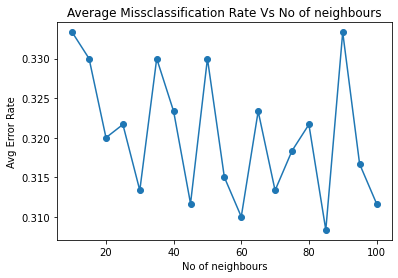

In [30]:
#Plotting miss error rate for test vs No of estimators
plt.scatter(x=rf_noEst_list,y=rf_avgErr_list)
plt.plot(rf_noEst_list,rf_avgErr_list)
plt.title("Average Missclassification Rate Vs No of neighbours")
plt.xlabel("No of neighbours")
plt.ylabel("Avg Error Rate")
plt.show()

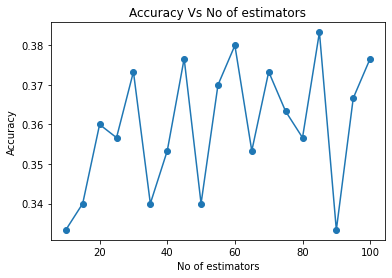

In [31]:
#Plotting miss error rate for test vs accuracy
plt.scatter(x=rf_noEst_list,y=rf_accuracy_list)
plt.plot(rf_noEst_list,rf_accuracy_list)
plt.title("Accuracy Vs No of estimators")
plt.xlabel("No of estimators")
plt.ylabel("Accuracy")
plt.show()

In [32]:
print(rf_avgErr_list)
print(rf_noEst_list)
print(rf_accuracy_list)

[0.3333333333333333, 0.33, 0.32, 0.32166666666666666, 0.31333333333333335, 0.32999999999999996, 0.32333333333333336, 0.31166666666666665, 0.32999999999999996, 0.315, 0.30999999999999994, 0.3233333333333333, 0.31333333333333335, 0.31833333333333336, 0.32166666666666666, 0.30833333333333335, 0.3333333333333333, 0.31666666666666665, 0.31166666666666665]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[0.3333333333333333, 0.34, 0.36, 0.3566666666666667, 0.37333333333333335, 0.34, 0.35333333333333333, 0.37666666666666665, 0.34, 0.37, 0.38, 0.35333333333333333, 0.37333333333333335, 0.36333333333333334, 0.3566666666666667, 0.38333333333333336, 0.3333333333333333, 0.36666666666666664, 0.37666666666666665]


<b>The lowest missclassification rate is 0.301 for n_estimators=85.</b>

<b>Q10) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?</b>

In [33]:
from collections import Counter

#Fitting knn and random forest models with selected values of n_neighbours and n_estimators
knnObj = KNeighborsClassifier(n_neighbors=30)
knnObj.fit(X_train, y_train)
rfObj = RandomForestClassifier(criterion='entropy',n_estimators=30)
rfObj.fit(X_train, y_train)
y_en_pred = []

for x in X_test:
    y_pred_lst = []
    y_pred_lst.append((logRegObj.predict(x.reshape(1,-1))).item(0))  #Model1
    y_pred_lst.append((knnObj.predict(x.reshape(1,-1))).item(0))   #Model2
    y_pred_lst.append((svcLinearObj.predict(x.reshape(1,-1))).item(0))   #Model3
    y_pred_lst.append((gauObj.predict(x.reshape(1,-1))).item(0))      #Model4
    y_pred_lst.append((rfObj.predict(x.reshape(1,-1))).item(0))          #Model5
    class_count = Counter(y_pred_lst)
    max_cls_count = class_count.most_common(1)
    y_en_pred.append(max_cls_count[0][0])
    

In [35]:
cm = confusion_matrix(y_test, y_en_pred)
print("Confusion Marix: \n")
print(cm)

missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass = getAvgMRperClass(cm)

print()
printMissErrRatePerClass(missRate_1,missRate_2,missRate_3,missRate_4,avgMRperClass)


Confusion Marix: 

[[49  4 19  8]
 [17 16 22 10]
 [36 11 27 10]
 [27 15 10 19]]

Missclassfication Rates for Classes:

Class1: 0.37
Class2: 0.2633333333333333
Class3: 0.36
Class4: 0.26666666666666666

Average Error Rate per Class: 0.315


<b>Missclassification rate for ensemble model is 0.31.</b>